[ Info: Saved animation to D:\OneDrive\public\0043\pvalue_and_posterior.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0043\\pvalue_and_posterior.gif")
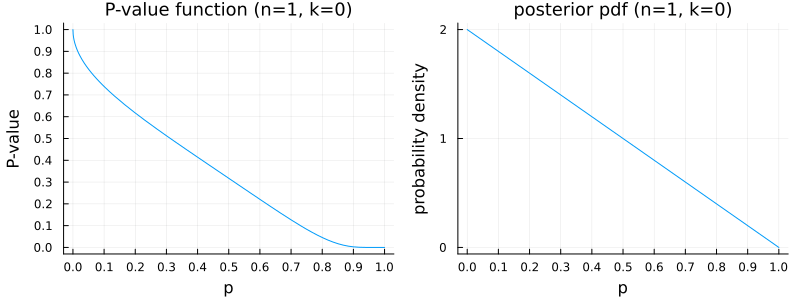

In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

safediv(x, y) = x == 0 ? zero(x*y) : x/y

function pvalue(k, n, p)
    z = safediv(k - n*p, √(n*p*(1 - p)))
    2ccdf(Normal(0, 1), abs(z))
end

posterior(k, n; a=1, b=1) = Beta(a+k, b+n-k)

N = 200
p₀ = 0.3
sample = rand(Bernoulli(p₀), N)
anim = @animate for n in [1:N; fill(N, 20)]
    k = sum(sample[1:n])
    P = plot(p -> pvalue(k, n, p), 0, 1; label="")
    plot!(xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(xguide="p", yguide="P-value")
    title!("P-value function (n=$n, k=$k)")
    Q = plot(p -> pdf(posterior(k, n), p), 0, 1; label="")
    plot!(xtick=0:0.1:1, ytick=0:20)
    plot!(xguide="p", yguide="probability density")
    title!("posterior pdf (n=$n, k=$k)")
    plot(P, Q; size=(800, 300))
    plot!(titlefontsize=12)
    plot!(leftmargin=4Plots.mm, bottommargin=4Plots.mm)
end
gif(anim, "pvalue_and_posterior.gif")